## Heart Disease Prediction using Logistic Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
print("\nMissing values per column:\n", data.isnull().sum())



Missing values per column:
 male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [6]:
data = data.dropna()

In [7]:
data.shape

(3658, 16)

### Visualization

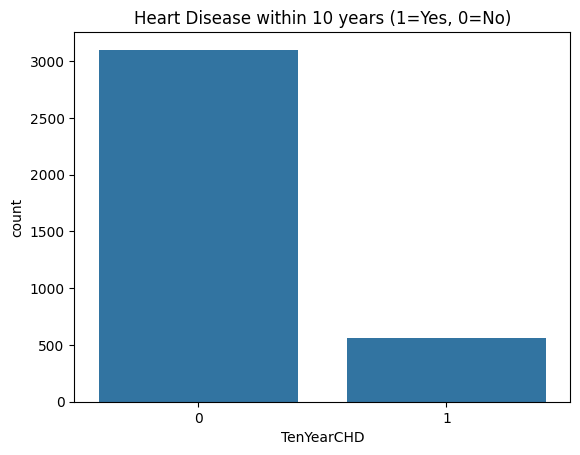

In [8]:
sns.countplot(x='TenYearCHD', data=data)
plt.title("Heart Disease within 10 years (1=Yes, 0=No)")
plt.show()

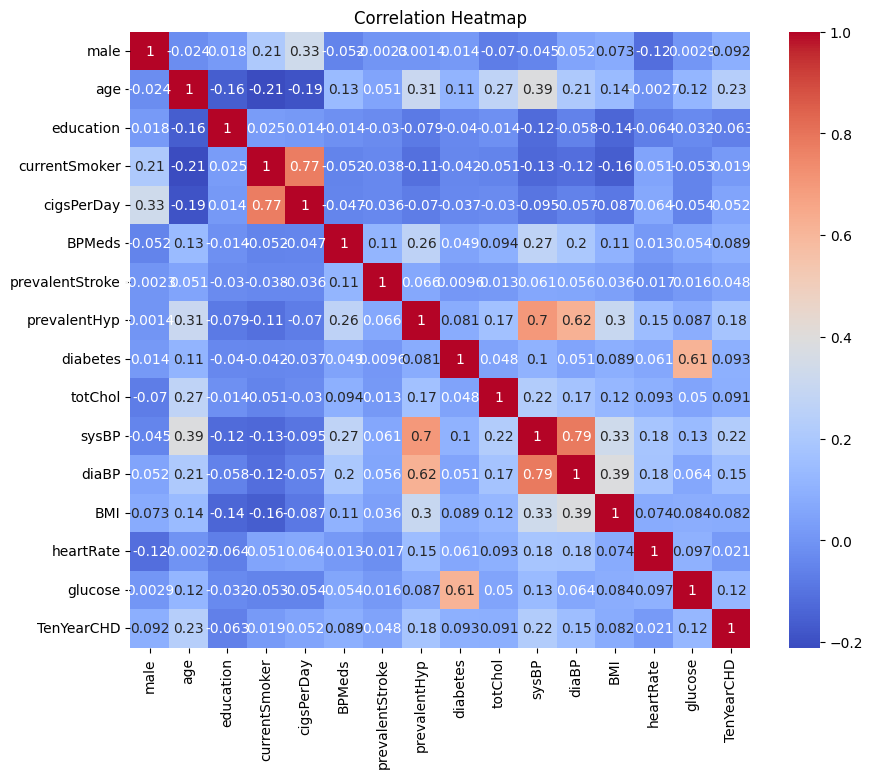

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
# Split Data
X = data.drop('TenYearCHD', axis=1)  # Features
y = data['TenYearCHD']   # Target variable

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (2926, 15)
Testing data shape: (732, 15)


In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Traninig logestic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [14]:
# Predictions
y_pred = model.predict(X_test_scaled)

In [15]:
# Evaluate Model
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.8401639344262295

Confusion Matrix:
 [[606   4]
 [113   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.69      0.07      0.13       122

    accuracy                           0.84       732
   macro avg       0.77      0.53      0.52       732
weighted avg       0.82      0.84      0.78       732



In [16]:
# Predict for a New Person
# Example values (adjust as needed):
# male=1, age=45, education=2, currentSmoker=1, cigsPerDay=10,
# BPMeds=0, prevalentStroke=0, prevalentHyp=1, diabetes=0,
# totChol=230, sysBP=130, diaBP=85, BMI=27.5, heartRate=75, glucose=80
new_data = np.array([[1,45,2,1,10,0,0,1,0,230,130,85,27.5,75,80]])

In [17]:
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

print("\nPrediction for new sample:",
      "High Risk of Heart Disease" if prediction[0] == 1 else "Low Risk of Heart Disease")


Prediction for new sample: Low Risk of Heart Disease


c:\Python Soft\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
